# K-means from scratch & with scikit learn
My goal in this notebook is in the firtly to code from scratch the kmeans algorithm to understand this model and secondly to use scikit learn library 

### 1-From scratch

In [17]:
import numpy as np
import matplotlib.pyplot as plt
X=[np.random.uniform(4) for _ in range(30)]
Y=[np.random.uniform(2.5,3) for _ in range(30)]
X=X+[np.random.uniform(6.5,7) for _ in range(30,60)]
Y=Y+[np.random.uniform(1.8,2.4) for _ in range(30,60)]
X=X+[np.random.uniform(4,5) for _ in range(60,100)]
Y=Y+[np.random.uniform(1.5,2.) for _ in range(60,100)]

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def distance(x1,y1,x2,y2):
    return np.sqrt(np.square(x1-x2)+np.square(y1-y2))
def identiqueList(X,Y):
    if (len(X)!=len(Y) or len(X)==0 or len(Y)==0):
        return False
    identique=0
    for i in range(len(X)):
        if X[i]==Y[i]:
            identique=identique+1
    if identique==len(X):
        return True
    else:
        return False

        
def kmeans(X,Y,k):
    
    centroids=[]
    for i in range(k):
        position={"x":np.random.uniform(min(X),max(X)),"y":np.random.uniform(min(Y),max(Y))}
        centroids.append(position)
        labels=[]
        pivot_labels=[]
    while(identiqueList(pivot_labels,labels)==False):
        plt.scatter(X,Y,color="red")
        for i in range(len(centroids)):
            plt.scatter(centroids[i]["x"],centroids[i]["y"])
        plt.show()
        pivot_labels=labels
        labels=[]
        for i in range(len(X)):
            min_distance=distance(X[i],Y[i],centroids[0]["x"],centroids[0]["y"])
            centroid=0
            for j in range(1,k):
                dist=distance(X[i],Y[i],centroids[j]["x"],centroids[j]["y"])
                if dist<min_distance:
                    centroid=j
                    min_distance=dist
            labels.append(centroid)

        for i in range(k):
            x=0
            y=0
            nbr=0
            for j in range(len(X)):
                if labels[j]==i:
                    x=x+X[j]
                    y=y+Y[j]
                    nbr=nbr+1
            if nbr!=0:
                centroids[i]={"x":x/nbr,"y":y/nbr}
            
        print(identiqueList(labels,pivot_labels))
    return (centroids)
def predict_class(x,y,centroids):
    label=0
    distance_min=distance(x,y,centroids[0]["x"],centroids[0]["y"])
    for i in range(1,len(centroids)):
        if distance(x,y,centroids[i]["x"],centroids[i]["y"])<distance_min:
            label=i
            min_distance=distance(x,y,centroids[i]["x"],centroids[i]["y"])
    return label
        

        
    

    
                

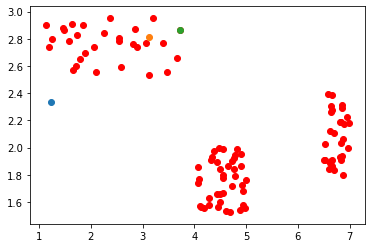

False


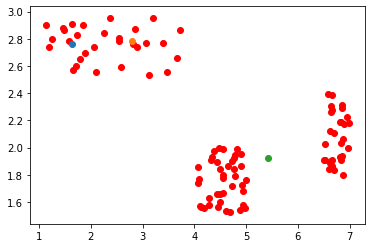

False


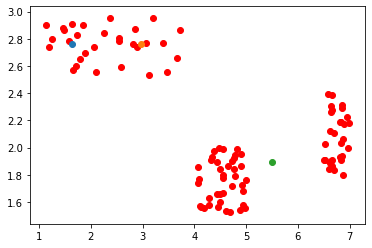

False


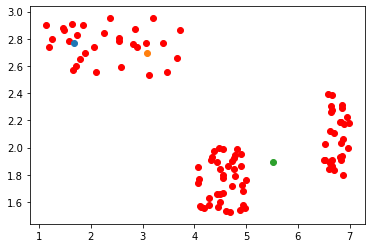

False


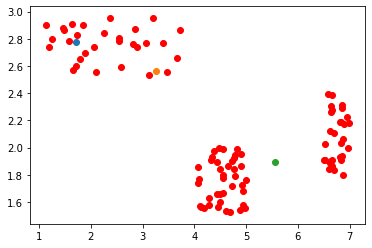

False


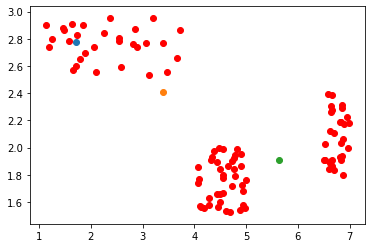

False


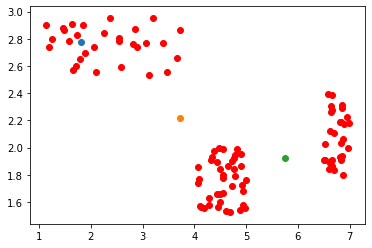

False


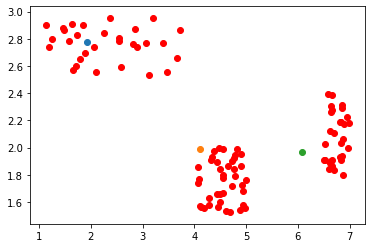

False


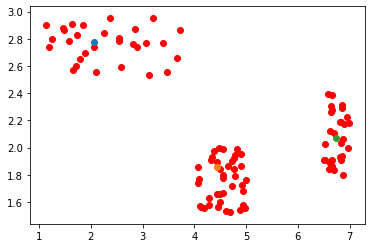

False


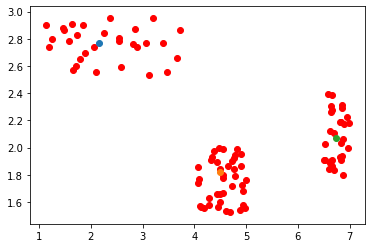

True


In [30]:
centroids=kmeans(X,Y,3)

In [31]:
centroids[0]

{'x': 2.153241114930635, 'y': 2.7696819867752063}

In [33]:
predict_class(4.4,2,centroids[0])

KeyError: 0

# 2 Now lets use the scikit learn method

lets import the python libraries first

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [34]:
data=[]
for i in range(len(X)):
     data.append([X[i],Y[i]])
data=np.array(data)
data

array([[2.55296327, 2.78231871],
       [3.05674745, 2.77232595],
       [1.13056051, 2.89791477],
       [1.66315849, 2.57129178],
       [3.11354911, 2.53457726],
       [1.62944218, 2.90935137],
       [2.8935348 , 2.74123545],
       [1.46279457, 2.87666914],
       [1.83963685, 2.89794848],
       [2.55298623, 2.80735043],
       [1.72409165, 2.82868493],
       [2.8536416 , 2.86919323],
       [2.06469495, 2.73608559],
       [3.47890064, 2.5521495 ],
       [1.58140156, 2.78295212],
       [3.19631897, 2.94937851],
       [2.57775181, 2.59480159],
       [1.79009887, 2.65242173],
       [1.70544138, 2.60094499],
       [2.26234056, 2.84537855],
       [1.89541908, 2.69358525],
       [1.24768002, 2.79567629],
       [3.39646917, 2.76716584],
       [1.19393346, 2.73816617],
       [2.37053036, 2.95190983],
       [1.47981727, 2.86591754],
       [2.09211221, 2.55775647],
       [3.66187143, 2.65799596],
       [3.72465737, 2.8674434 ],
       [2.81039373, 2.7604117 ],
       [6.

In [35]:
model=KMeans(n_clusters=3)
model=model.fit(scale(data))
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


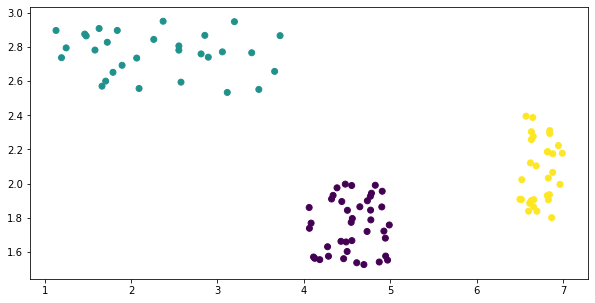

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(data[:,0],data[:,1],c=model.labels_.astype(np.float))
plt.show()

#### Nice scikit learn is powerfull we have our clusters 
Now we can predict an unseen data 

# centroids from scratch V centroids Kmeans


In [39]:
print("centers of Kmean {}".format(model.cluster_centers_))
print("center of the model from scratch {}".format(centroids))

centers of Kmean [[ 0.01561339 -0.88717315]
 [-1.2573874   1.36326461]
 [ 1.23656955 -0.18036709]]
center of the model from scratch [{'x': 2.153241114930635, 'y': 2.7696819867752063}, {'x': 4.498715008819152, 'y': 1.8203107456302736}, {'x': 6.736292000823529, 'y': 2.071190519992424}]
